## Practical Implementation of the Time Series 

1- Data Ingestion

2- EDA and Visualization

3- Preprocessing 

4- Model Building 

5- Model Evaluation


## Data Ingestion 

- Importing the required libraries and packages.
- Load the Dataset into a pandas dataframe.
- Check the datatype of and convert it into  a datetime format.
- Set the datetime column as the index of the dataframe.

In [1]:
#installing the opendatasets library to download the dataset 
! pip install opendatasets pandas --quiet

In [2]:
import opendatasets as od

In [3]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [4]:
url ='https://raw.githubusercontent.com/sunnysavita10/time-series/main/TSLA.CSV'

In [5]:
# data= od.download(url)

In [6]:
df= pd.read_csv("TSLA.CSV")

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [8]:
df.shape

(758, 8)

In [9]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


**Univariate Time Series Analysis**

In [10]:
#Extracting only one column 
stock_data= df[['Date','Close']]

In [11]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [12]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [13]:
stock_data.isna().sum()

Date     0
Close    0
dtype: int64

In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [15]:
# Typecasting the Date column to datetime

stock_data['Date']= pd.to_datetime(stock_data['Date'])

In [16]:
stock_data["Date"].dtype

dtype('<M8[ns]')

In [17]:
stock_data = stock_data.set_index("Date")

In [18]:
# converting the date column as an index of the dataframe 
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


- Why we are converting the Datetime column as an index of the dataframe?

    A- We can easily retrive the data

    B- Visualization becomes easy

    C- those Library has been design in such a way that it requires date column as an index ( scipy Statsmodel)

## EDA 

1. Statistical Summary of the data 

    - Compute summary statistics such as mean, median , mode and standard deviation to get an overview of the data.


2. Visulaize the Time Series Dataset.
   
    - Plot the time series data.
   
    - Plot the rolling mean and rolling standard deviation of the time series data.
   
    - Decompose the time series data into trends , seasonality and Noise
   
    - Plot the decomposed components to get a better understanding of the time series data.

3. Stationary Test.

    - Check if the time series data is stationary or not.

    - Check for the stationarity of the time series data using the Augmented Dickey-Fuller test.

4. Check for the Autocorrelation and 
    
    - Plot the autocorrelation function (ACF) and partial autocorrelation plot (PACF) to identify the order of the ARIMA model.

5. Outlier Detection 
    
    - Detect and handle the outliers in the time series data.

In [19]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import numpy as np 
import matplotlib.pyplot as plt

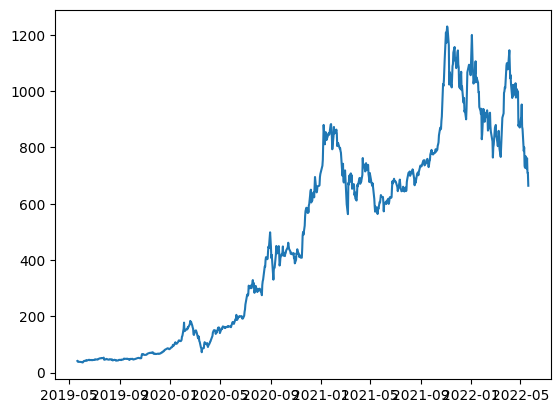

In [21]:
plt.plot(stock_data)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

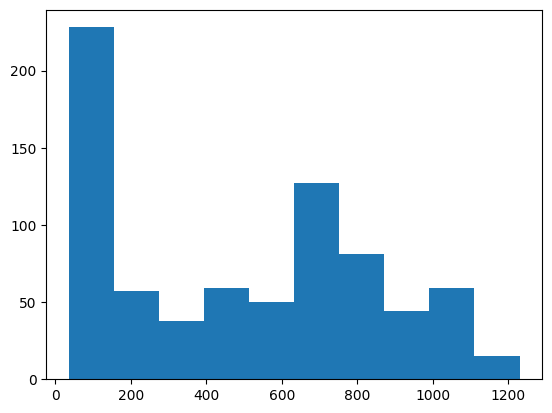

In [22]:
plt.hist(stock_data['Close'])

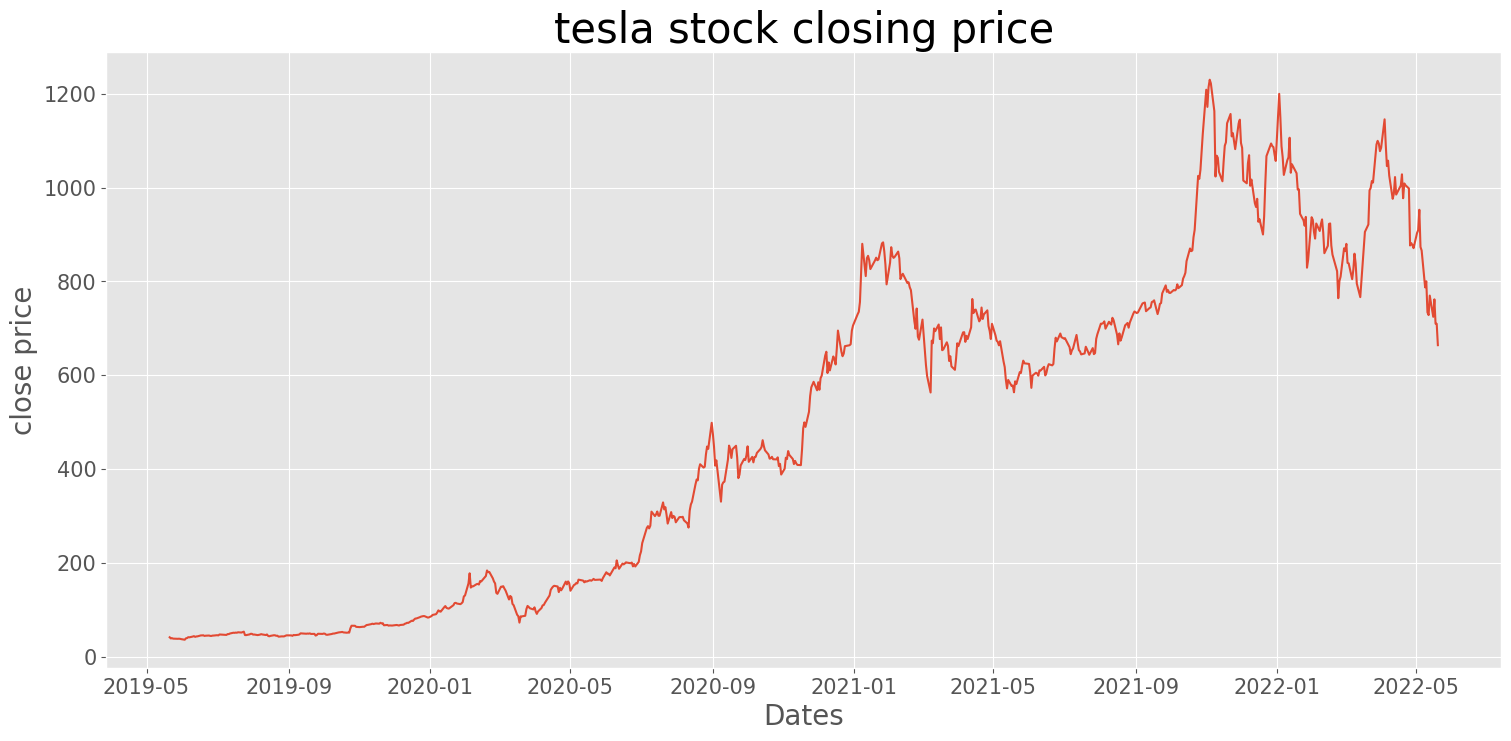

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.plot(stock_data["Close"])
plt.title("tesla stock closing price",fontsize=30)
plt.show()


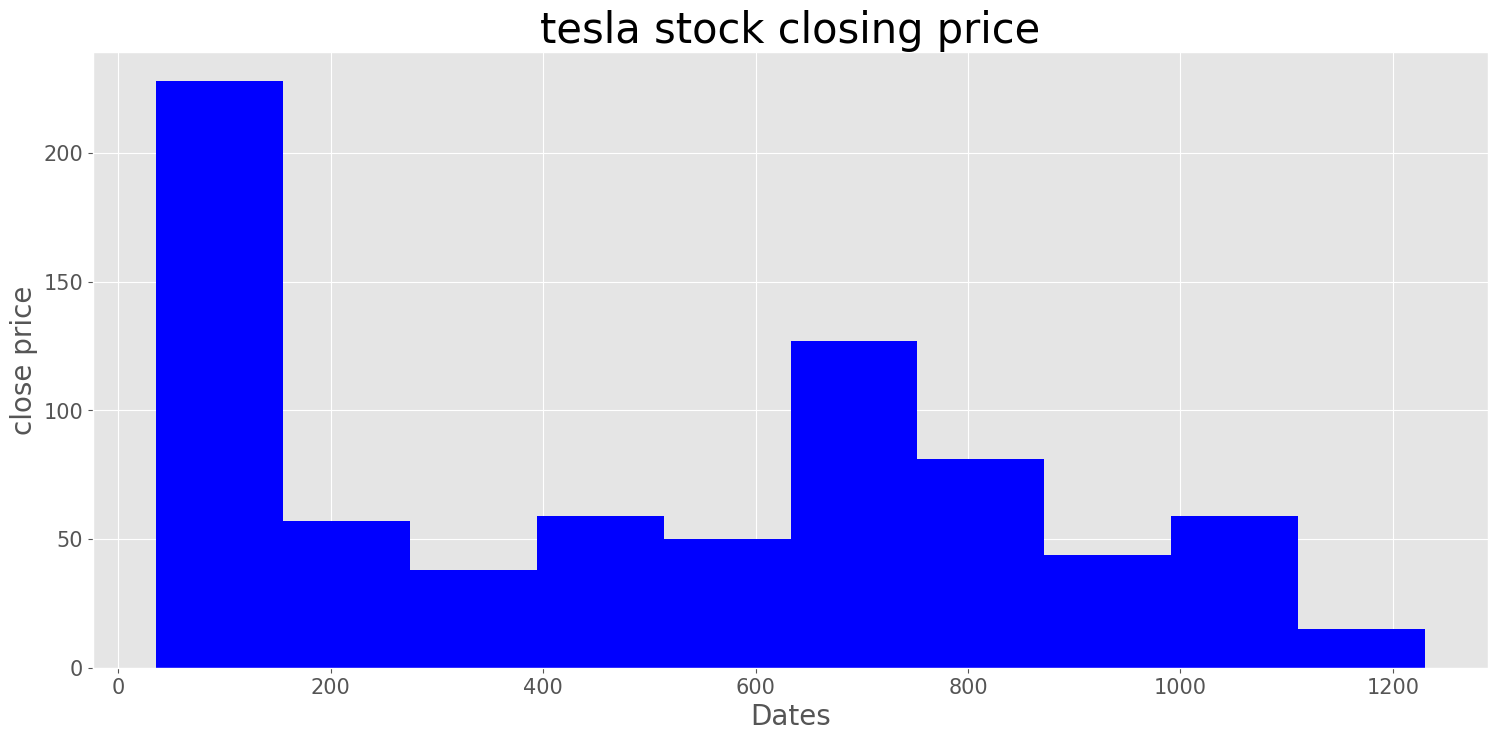

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates",fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel("close price",fontsize=20)
plt.yticks(fontsize = 15) 
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title("tesla stock closing price",fontsize=30)
plt.show()

In [25]:
! pip install scipy --upgrade

Defaulting to user installation because normal site-packages is not writeable


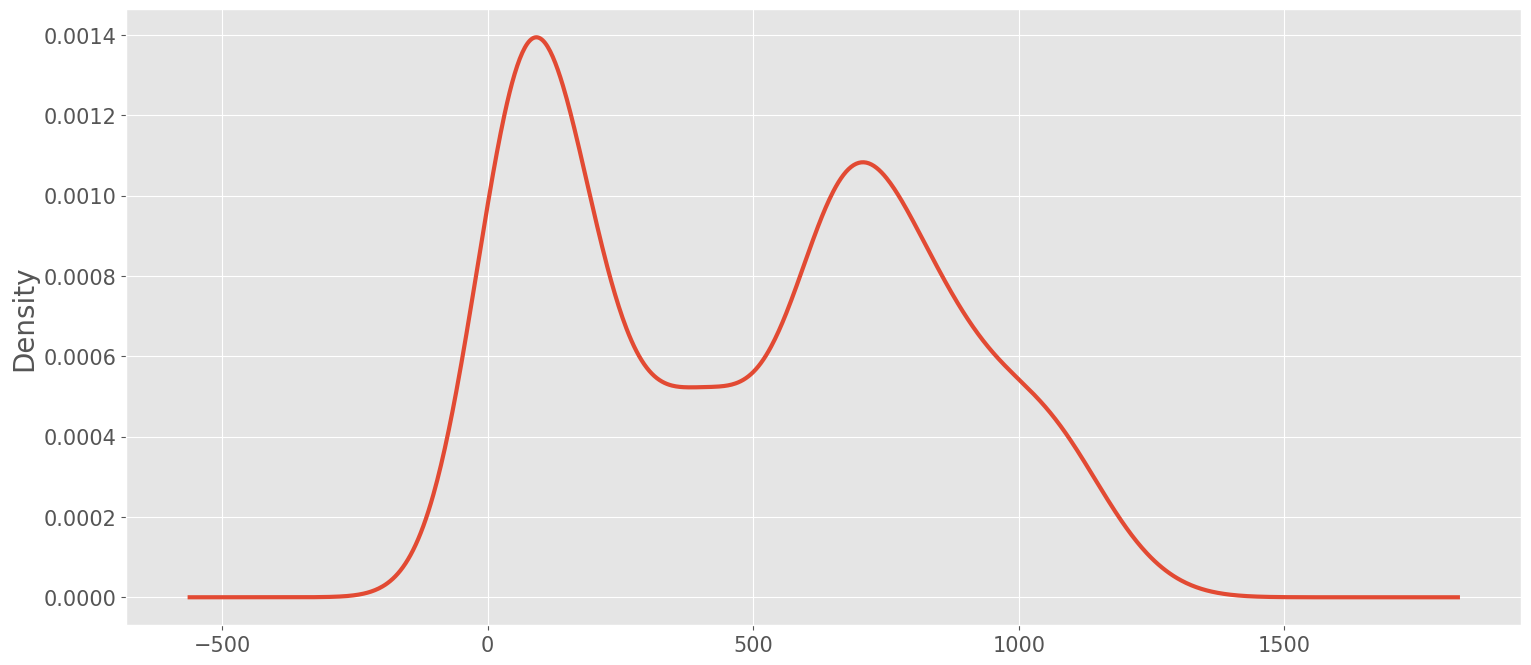

In [26]:
df_close = stock_data['Close'] 
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

### Smoothing the time series data 

In [27]:
# calculating the simple moving average with the window size of 365
simple_moving_avg = stock_data.Close.rolling(6).mean()

In [28]:
simple_moving_avg

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    757.184998
2022-05-17    752.934998
2022-05-18    737.896667
2022-05-19    733.799998
2022-05-20    723.116669
Name: Close, Length: 758, dtype: float64

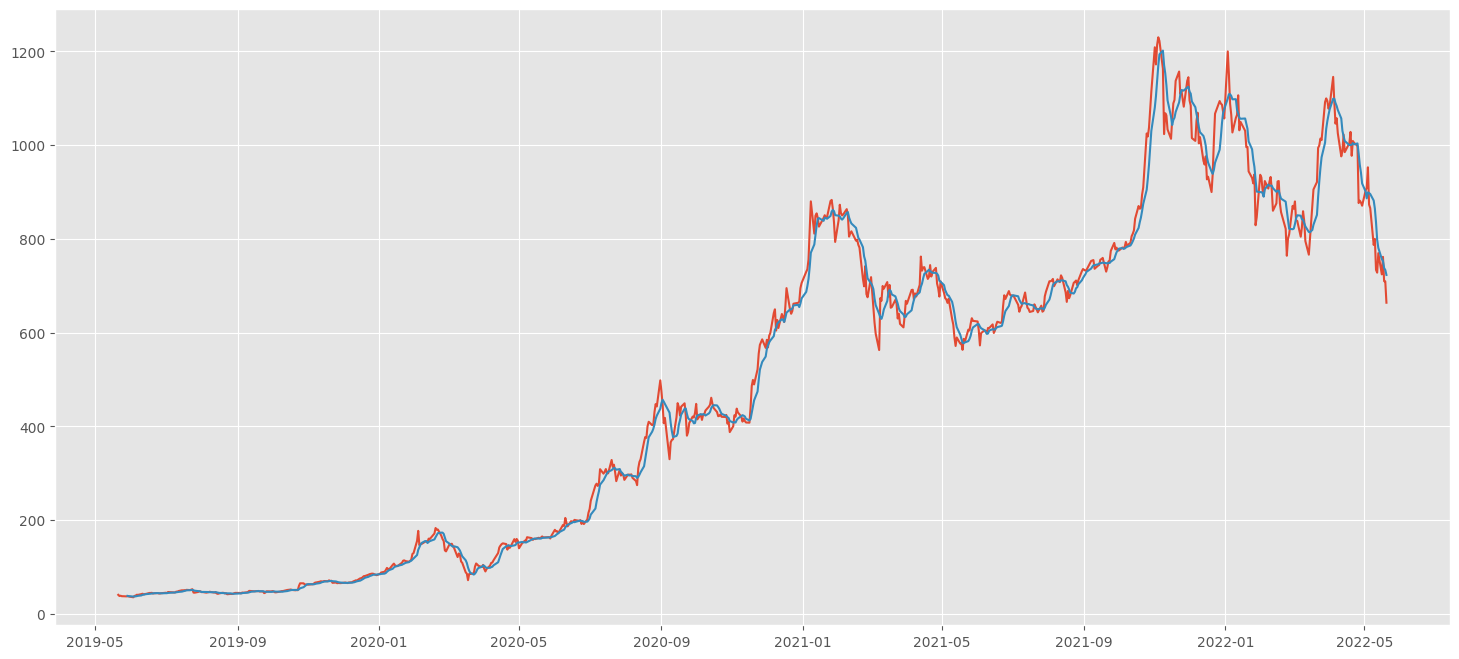

In [29]:
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(simple_moving_avg)
plt.show()

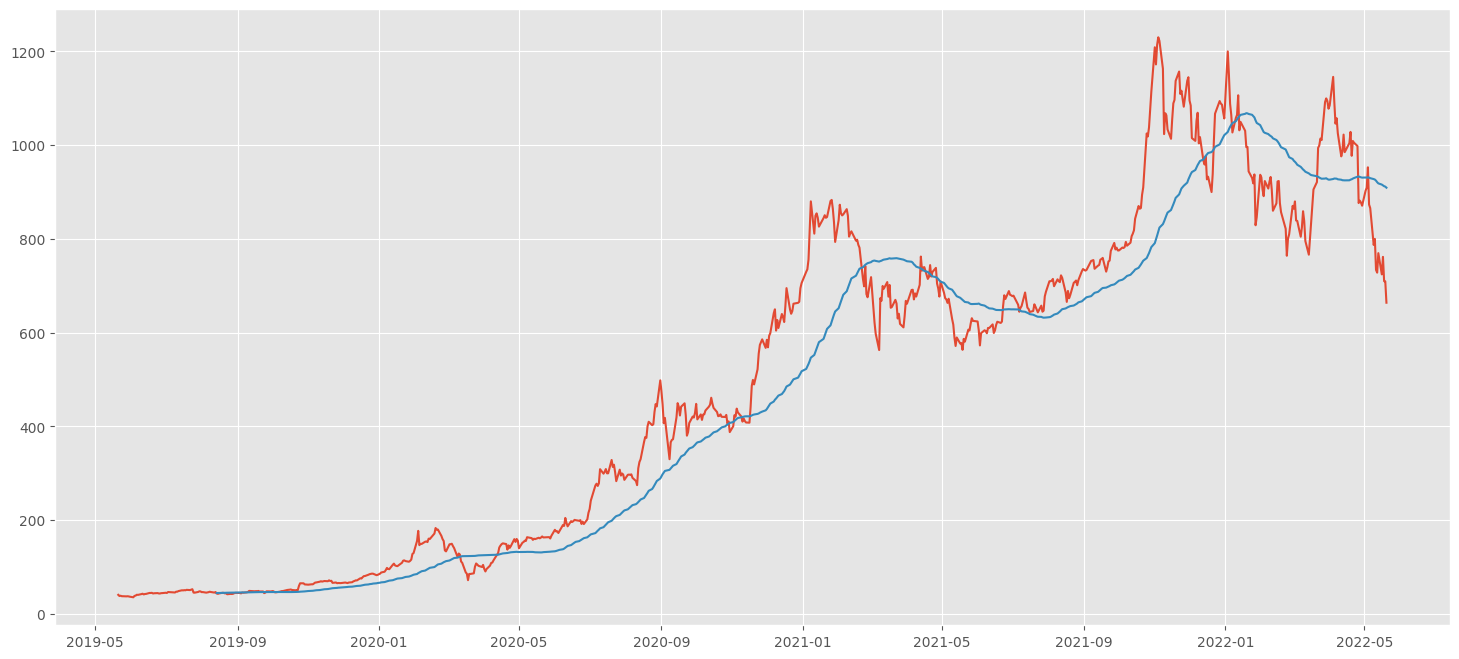

In [30]:
simple_moving_avg = stock_data.Close.rolling(60).mean()
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(simple_moving_avg)
plt.show()

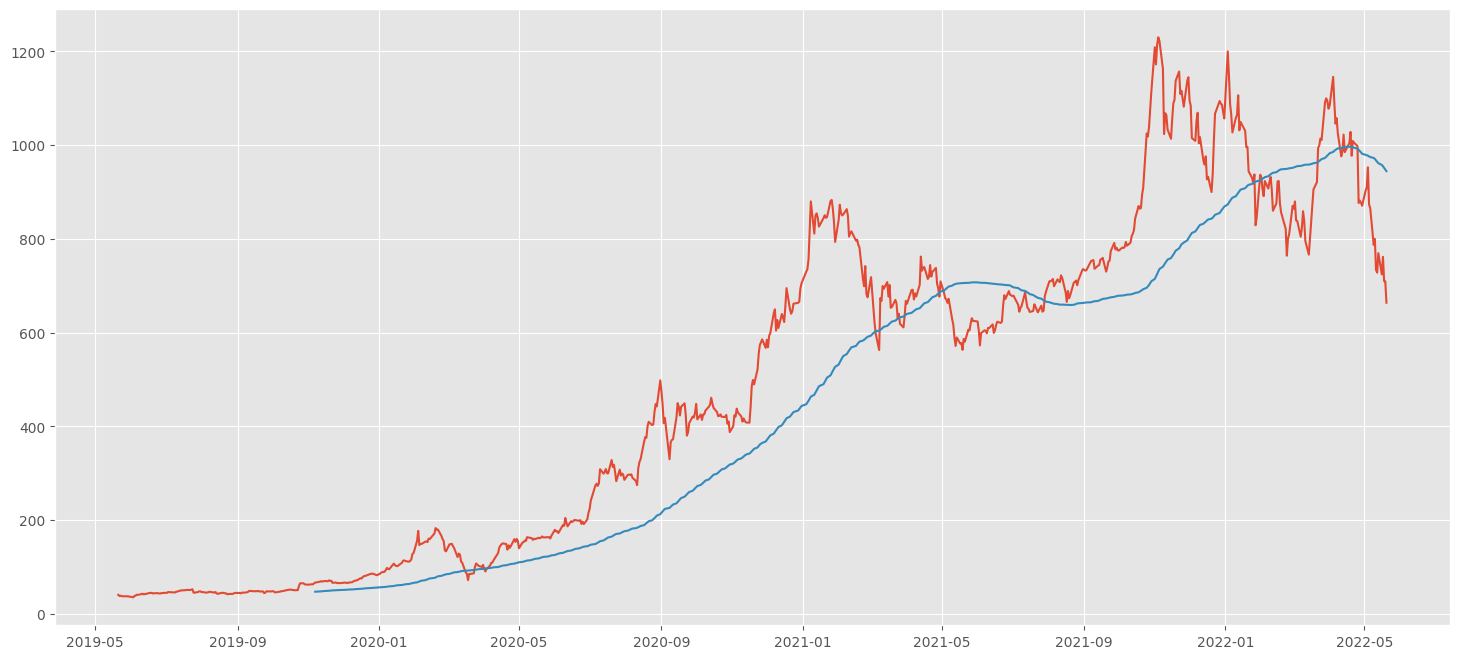

In [31]:
simple_moving_avg = stock_data.Close.rolling(120).mean()
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(simple_moving_avg)
plt.show()

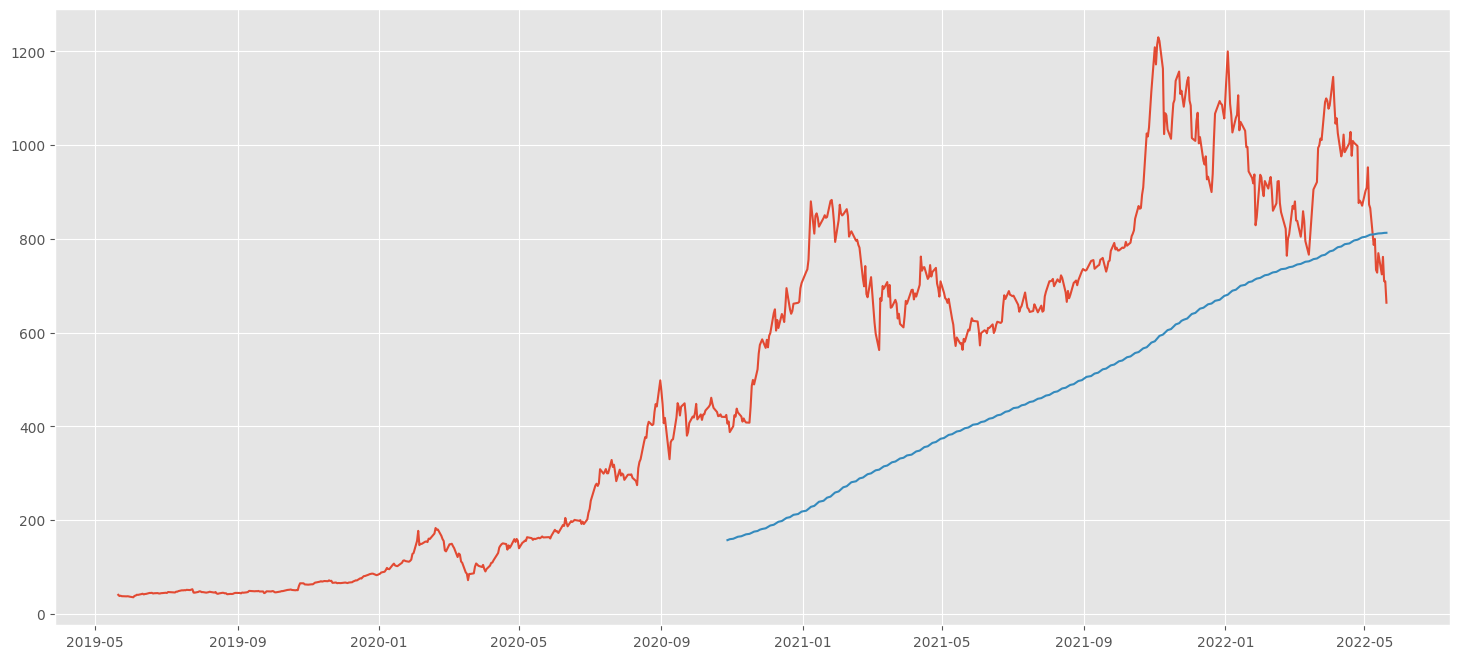

In [32]:
simple_moving_avg = stock_data.Close.rolling(365).mean()
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(simple_moving_avg)
plt.show()

In [33]:
# Calculating the rolling the standard deviation
rol_std=stock_data["Close"].rolling(365).std()

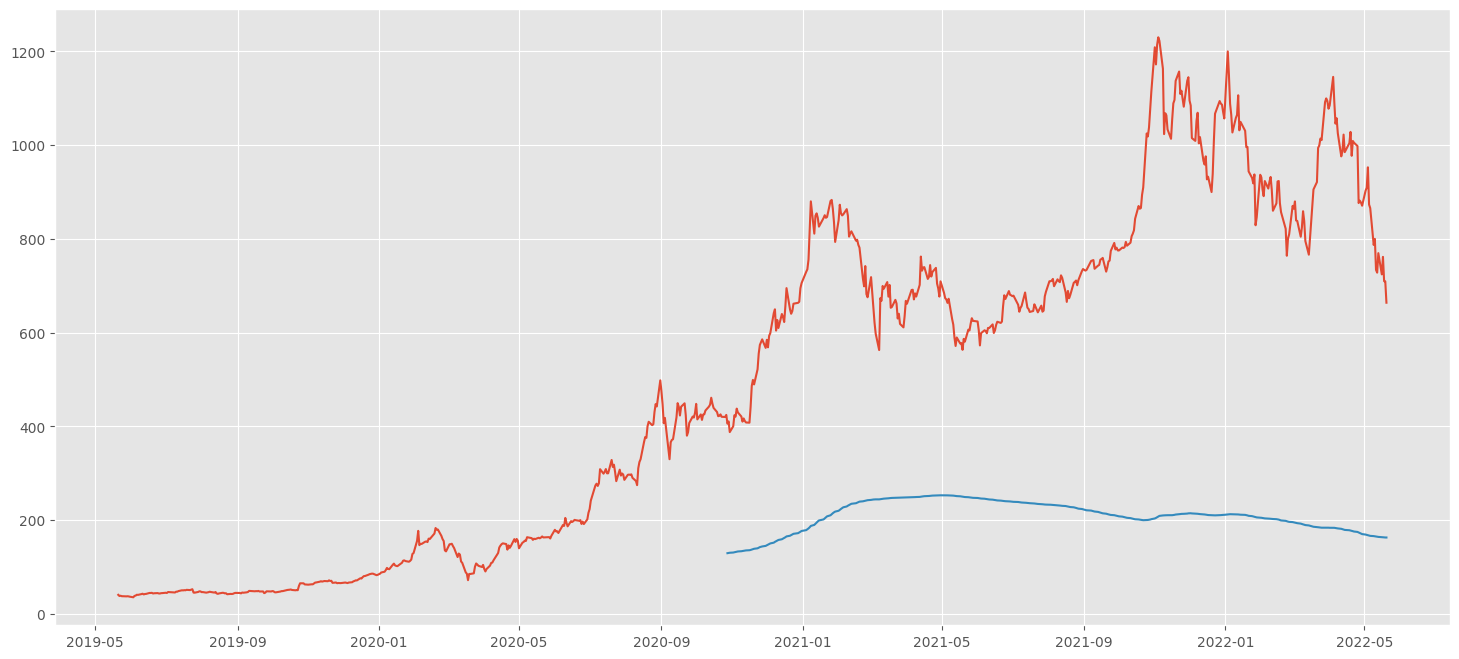

In [34]:
plt.figure(figsize=(18,8))
plt.plot(stock_data.Close)
plt.plot(rol_std)
plt.show()

In [35]:
! pip install statsmodels --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.14.0-cp311-cp311-win_amd64.whl (9.2 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [36]:
## Adafuller statistics test for testing the stationarity of the time series data.
# ADFT- Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

In [37]:
adft

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [38]:
# creating a dataseries for the test amd giving the name to each
pd.Series(adft[0:4],index=["test stats","p-value","lag","data point"])

test stats     -1.363009
p-value         0.599876
lag             9.000000
data point    748.000000
dtype: float64

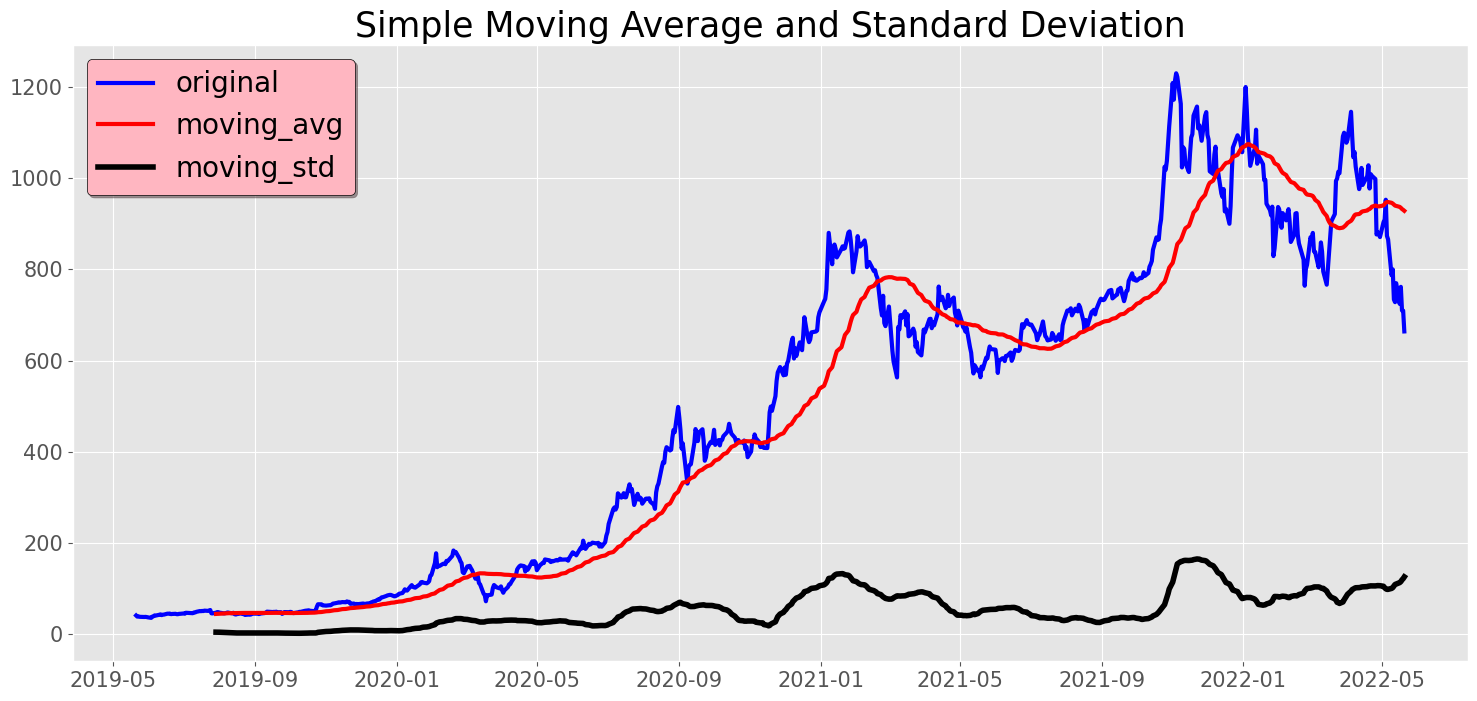

Results of Augented Dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [39]:
# Let's create a function to test the stationarity of the time series data

def test_stationarity( timeseries):
    # Let's first calculate the moving average and the variance of the time series
    moving_avg = timeseries.rolling (window=48).mean()
    # Let's find the variance of the time series
    moving_std = timeseries.rolling(window=48).std()
    
    # Let's plot the rolling statistics
    plt.figure(figsize=(18,8))
    plt.grid('both')    
    
    plt.plot(timeseries,color='blue',label='original',linewidth=3)
    plt.plot(moving_avg,color='red',label= 'moving_avg',linewidth=3)
    plt.plot(moving_std,color='black',label= 'moving_std',linewidth=4)
    
    plt.legend(loc='best',fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
    plt.title('Simple Moving Average and Standard Deviation', fontsize=25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of Augented Dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    
    # output for adft will give us without defining what the values are.
    
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

test_stationarity(stock_data.Close)

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(stock_data["Close"], model='multiplicative',period=30)

<Figure size 2000x1000 with 0 Axes>

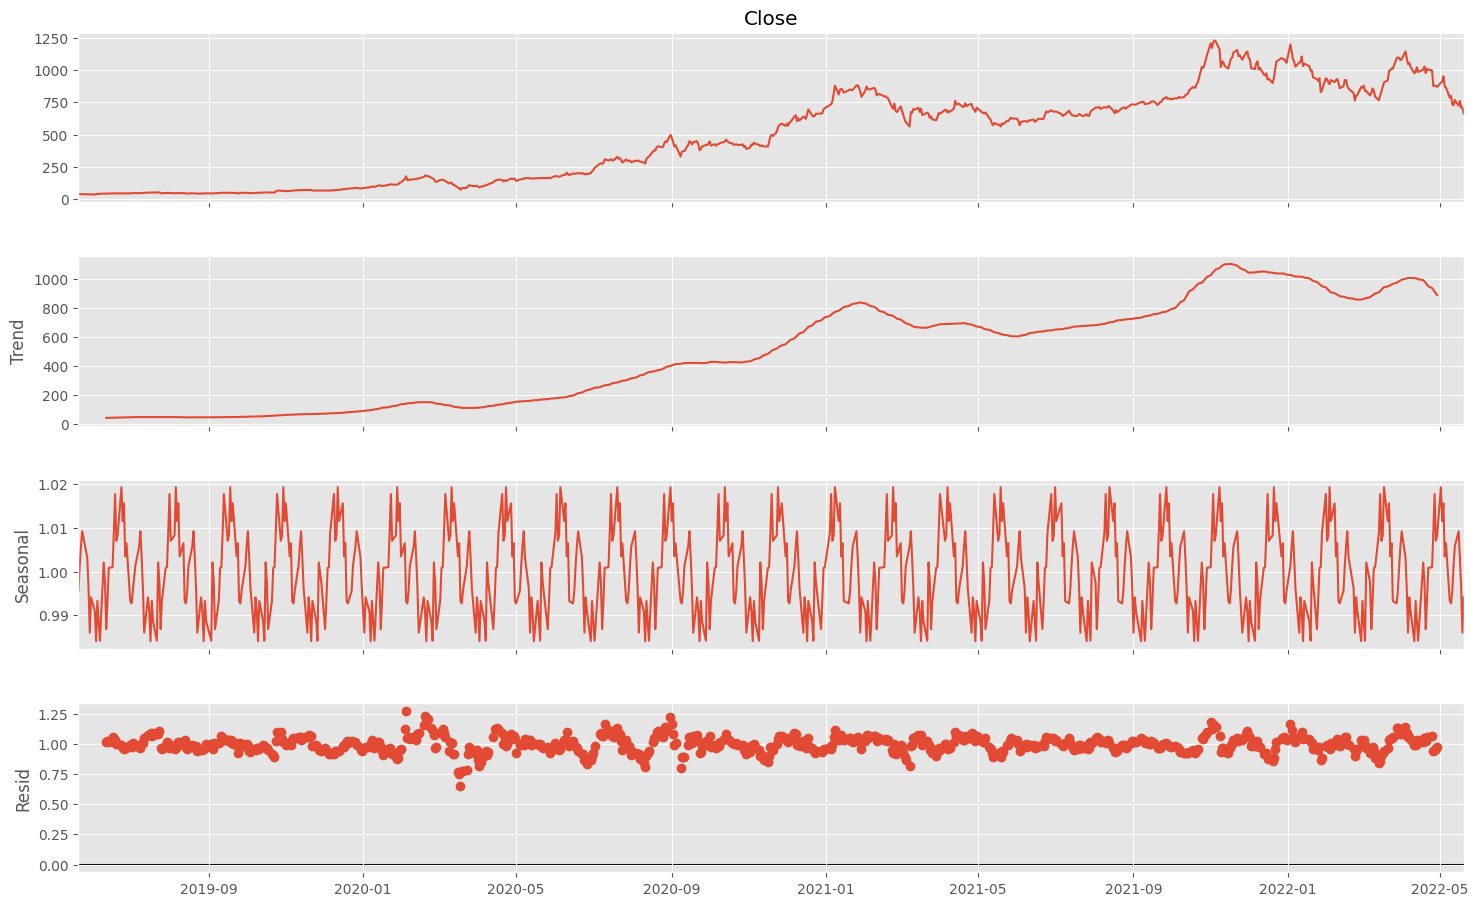

In [41]:
plt.figure(figsize=(20,10))
fig= results.plot()
fig.set_size_inches(17,10)

In [42]:
# seasonal components
results.seasonal

Date
2019-05-21    0.995645
2019-05-22    1.001321
2019-05-23    1.005804
2019-05-24    1.009275
2019-05-28    1.003281
                ...   
2022-05-16    1.009275
2022-05-17    1.003281
2022-05-18    0.996281
2022-05-19    0.986065
2022-05-20    0.994151
Name: seasonal, Length: 758, dtype: float64

In [43]:
# residual component
results.resid

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: resid, Length: 758, dtype: float64

In [44]:
# trend component
results.trend

Date
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
              ..
2022-05-16   NaN
2022-05-17   NaN
2022-05-18   NaN
2022-05-19   NaN
2022-05-20   NaN
Name: trend, Length: 758, dtype: float64

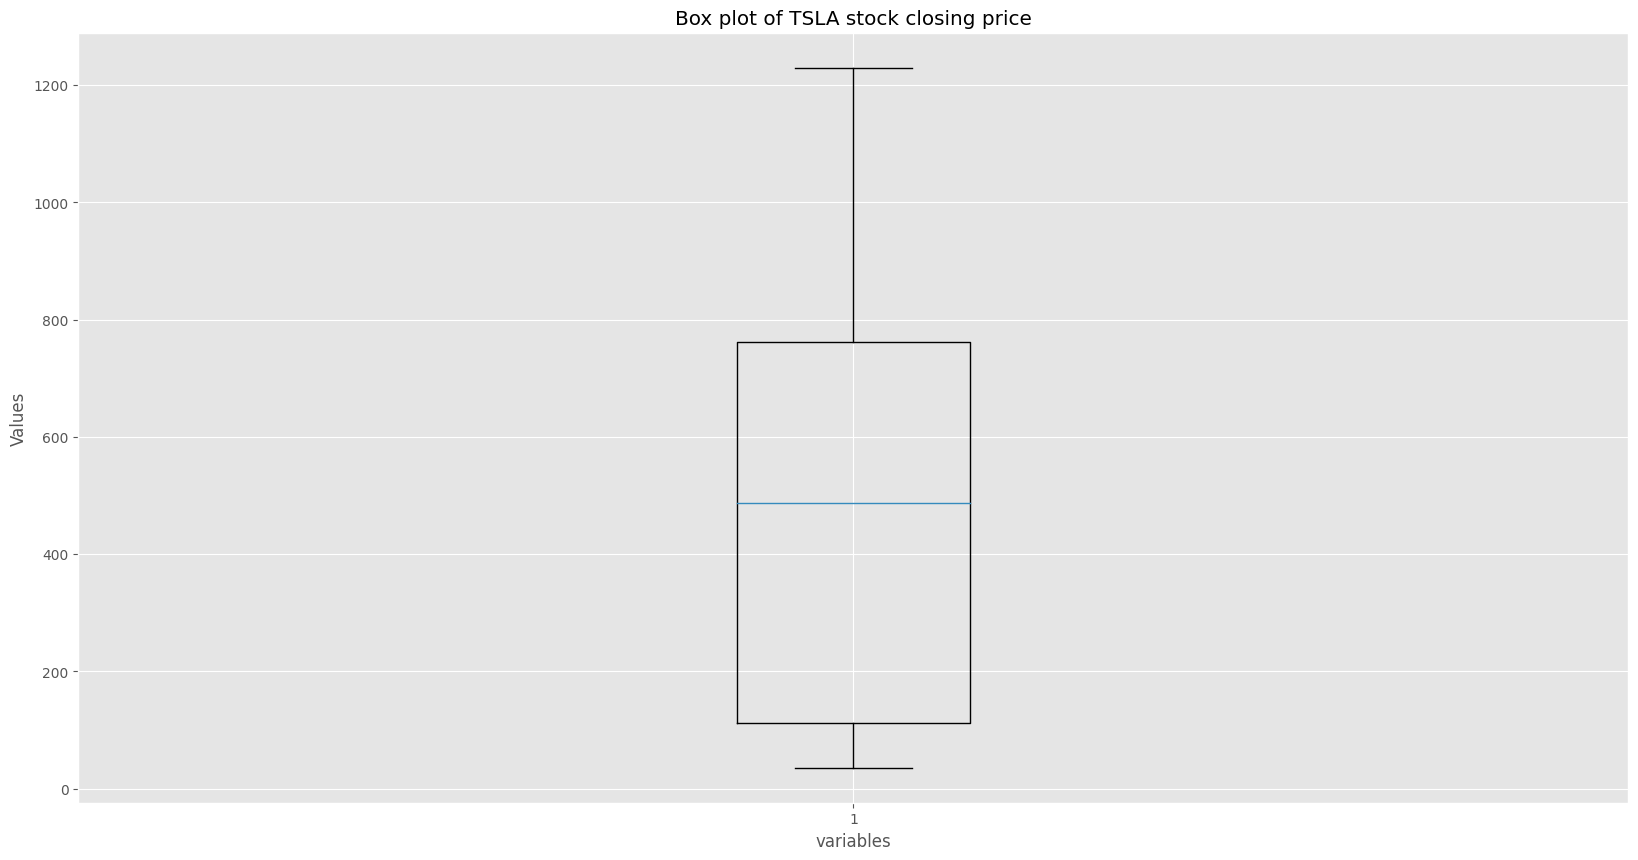

In [45]:
# Let's now examine the outliers in our dataset using the box plot 
fig, ax = plt.subplots(figsize=(25,10))

# plotting the box plot
ax.boxplot(stock_data["Close"])
# setting up the X and Y axis labels
ax.set_xlabel("variables")
ax.set_ylabel("Values")
ax.set_title("Box plot of TSLA stock closing price")

plt.show()

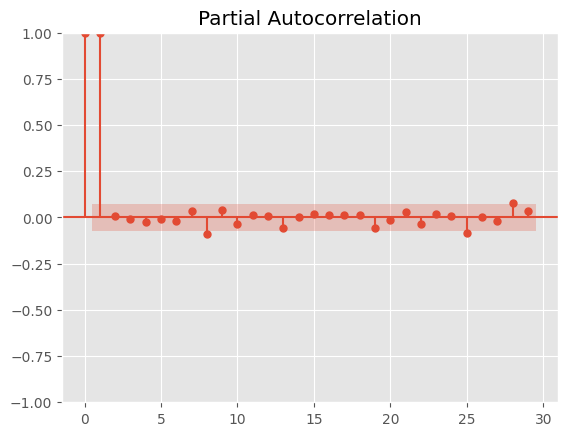

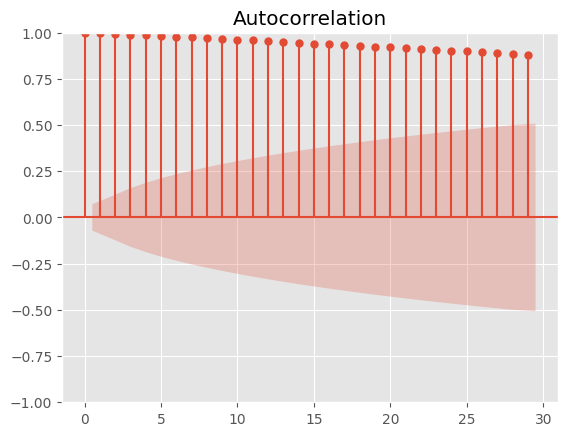

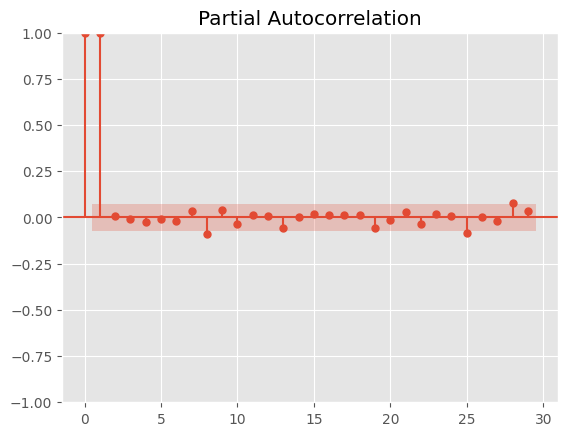

In [46]:
# Plotting ACF and PACF plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

## Preprocessing of the data 

1. Fill the misssing values.

2. Convert the data into a stationary time series.

3. IF neccessary then normalize the data.

4. Split the data into train and test data.

5. Clean the data by removing the outliers.

In [47]:
df_Close= stock_data.Close

In [48]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [49]:
# Let's comvert the non-stationary data into stationary data using the differencing technique.
tsla_close_price_differ= df_close.diff()

In [50]:
tsla_close_price_differ

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [51]:
# Droppimg the missing values 

tsla_close_differ_1 = tsla_close_price_differ.dropna()

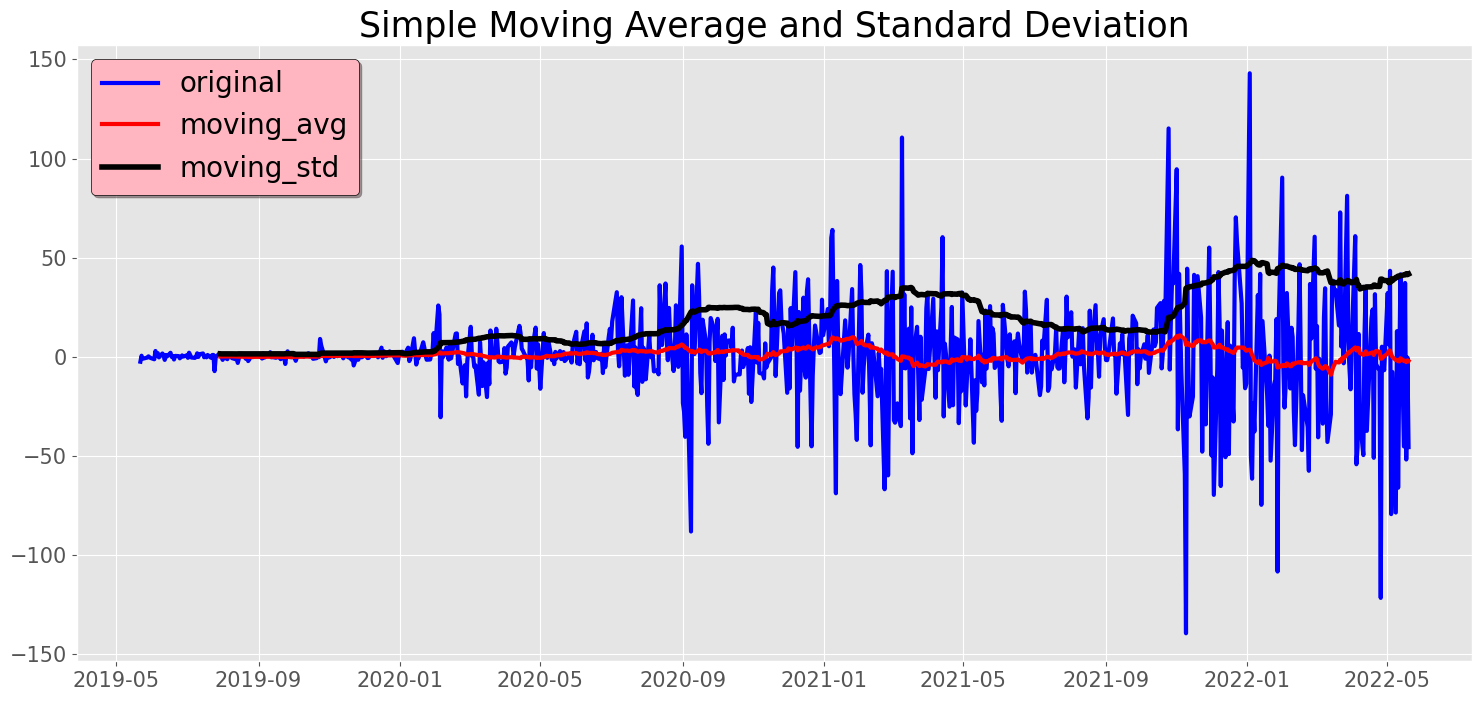

Results of Augented Dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [52]:
test_stationarity(tsla_close_differ_1)

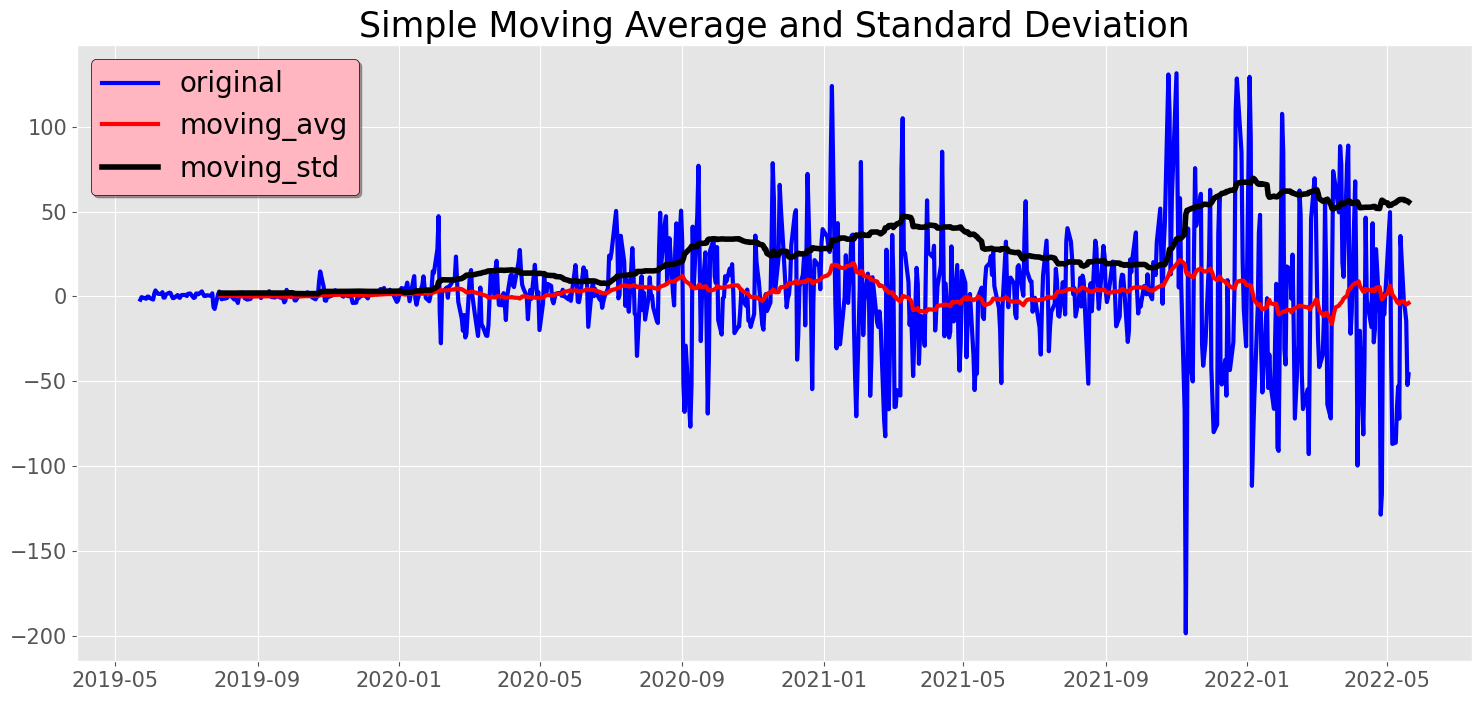

Results of Augented Dickey fuller test
Test Statistics               -6.027267e+00
p-value                        1.445919e-07
No. of lags used               1.700000e+01
Number of observations used    7.380000e+02
critical value (1%)           -3.439242e+00
critical value (5%)           -2.865464e+00
critical value (10%)          -2.568860e+00
dtype: float64


In [53]:
# Differencing again the main data 
tsla_close_diff_2=df_close.diff(2)
tsla_close_diff_2=df_close.diff(2)
tsla_close_diff_2A=tsla_close_diff_2.dropna()
test_stationarity(tsla_close_diff_2A)

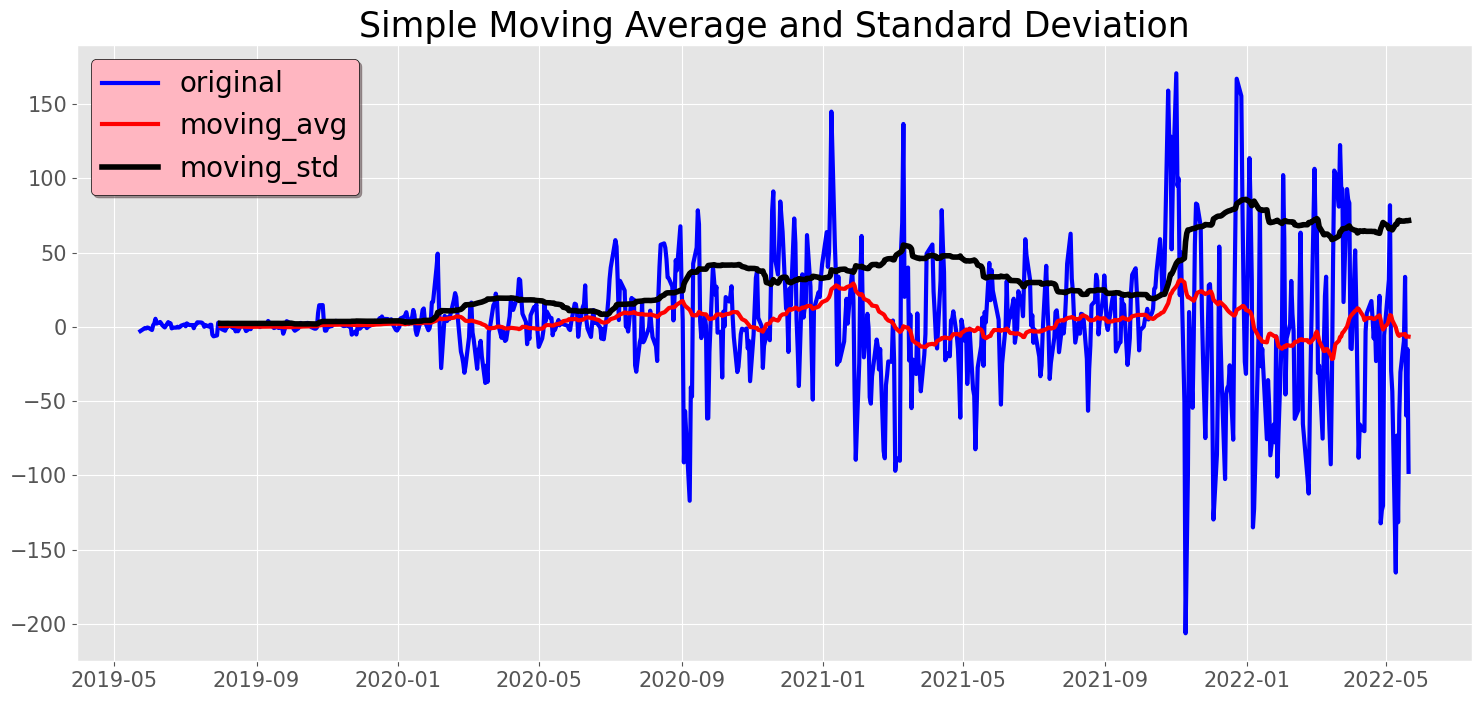

Results of Augented Dickey fuller test
Test Statistics               -5.697365e+00
p-value                        7.817959e-07
No. of lags used               1.900000e+01
Number of observations used    7.350000e+02
critical value (1%)           -3.439278e+00
critical value (5%)           -2.865480e+00
critical value (10%)          -2.568868e+00
dtype: float64


In [54]:
tsla_close_diff_3=df_close.diff(3)
tsla_close_diff_3=tsla_close_diff_3.dropna()
test_stationarity(tsla_close_diff_3)

In [55]:
df_Close.shape

(758,)

In [56]:
# splitting the train and test data
train_data= df_Close[0:-60]
test_data= df_Close[-60:]


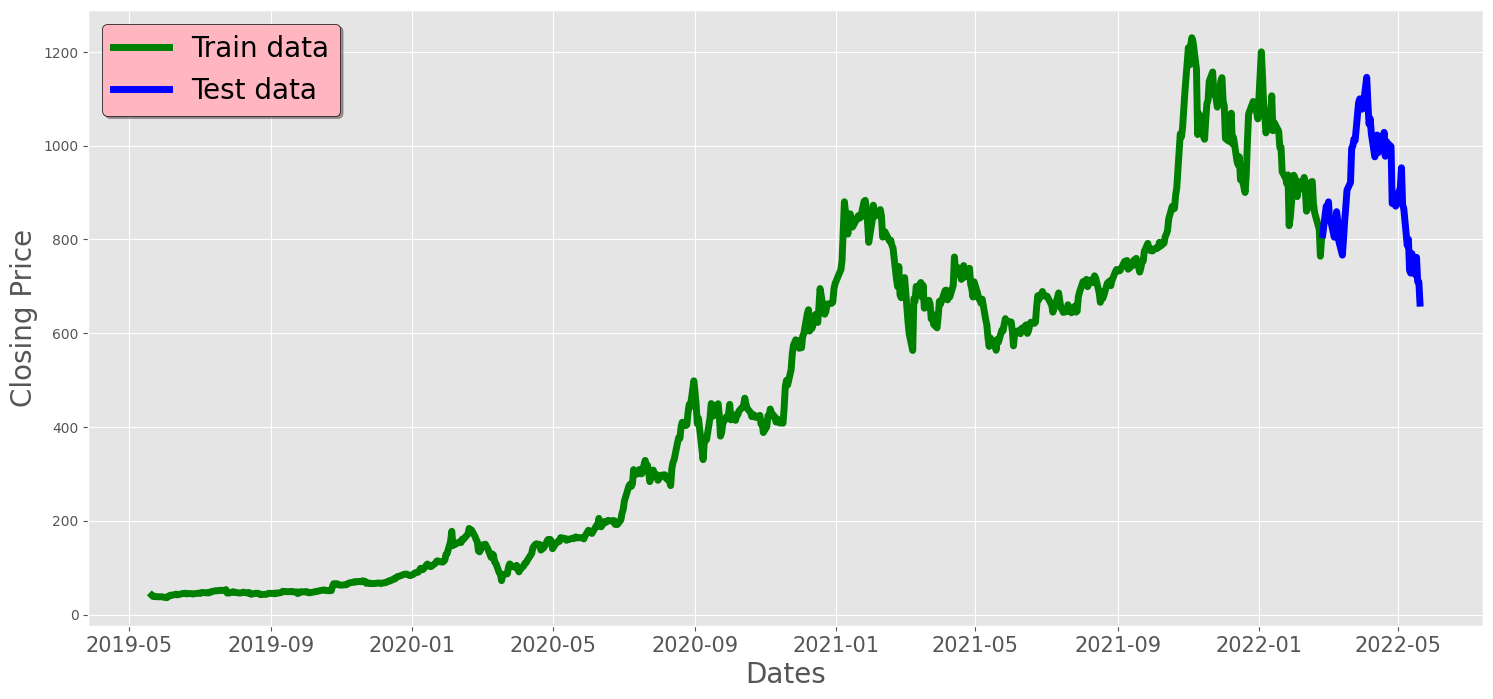

In [57]:
# let's now plot the train and test dataset 

plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates", fontsize=20)
plt.ylabel("Closing Price", fontsize =20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [58]:
! pip install scikit-learn --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [59]:
! pip install statsmodels --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [60]:
# let's mow import the ARIMA model 

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [61]:
history = [x for x in train_data]

In [62]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [65]:
# Let's fit the ARIMA model to the train data
model= ARIMA(history, order=(1,1,1))

In [66]:
ARIMA

statsmodels.tsa.arima.model.ARIMA

In [67]:
model= model.fit()

In [68]:
model

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Tue, 01 Aug 2023   AIC                           6306.700
Time:                        12:02:11   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
# let's now forecast the test dataset
model.forecast(60)

array([800.20438317, 800.0687973 , 800.03629669, 800.02850613,
       800.02663869, 800.02619106, 800.02608376, 800.02605804,
       800.02605187, 800.02605039, 800.02605004, 800.02604996,
       800.02604994, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993,
       800.02604993, 800.02604993, 800.02604993, 800.02604993])

In [71]:
test_data[59]

663.9000244140625

In [72]:
mean_squared_error([test_data[0]], [model.forecast(1)[0]])

93.42405426268355

In [73]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [74]:
# evaluate different combinations of p, d and q values for an ARIMA model to get the best order for ARIMA Model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [75]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.163
ARIMA(0, 0, 2) RMSE=170.658
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.579
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.598
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.690
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.738
ARIMA(2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [76]:
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
for p in p_values:
        for d in d_values:
            for q in q_values:
                print(p,d,q)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [78]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

history = [x for x in train_data]
predictions = list()
conf_list = list()

for t in range(len(test_data)):
    model = ARIMA(history, order=(1, 1, 0))
    model_fit = model.fit()

    # Forecast for one time step and get the confidence intervals
    forecast_result = model_fit.get_forecast(steps=1)
    forecast_mean = forecast_result.predicted_mean[0]
    forecast_stderr = forecast_result.se_mean[0]
    forecast_conf = forecast_result.conf_int(alpha=0.05)[0]

    predictions.append(forecast_mean)
    conf_list.append((forecast_conf[0], forecast_conf[1]))

    history.append(test_data[t])

print("RMSE of ARIMA Model:", np.sqrt(mean_squared_error(test_data, predictions)))
print("Accuracy of ARIMA Model:", r2_score(test_data, predictions))


RMSE of ARIMA Model: 39.475298262281285
Accuracy of ARIMA Model: 0.8890117457764755


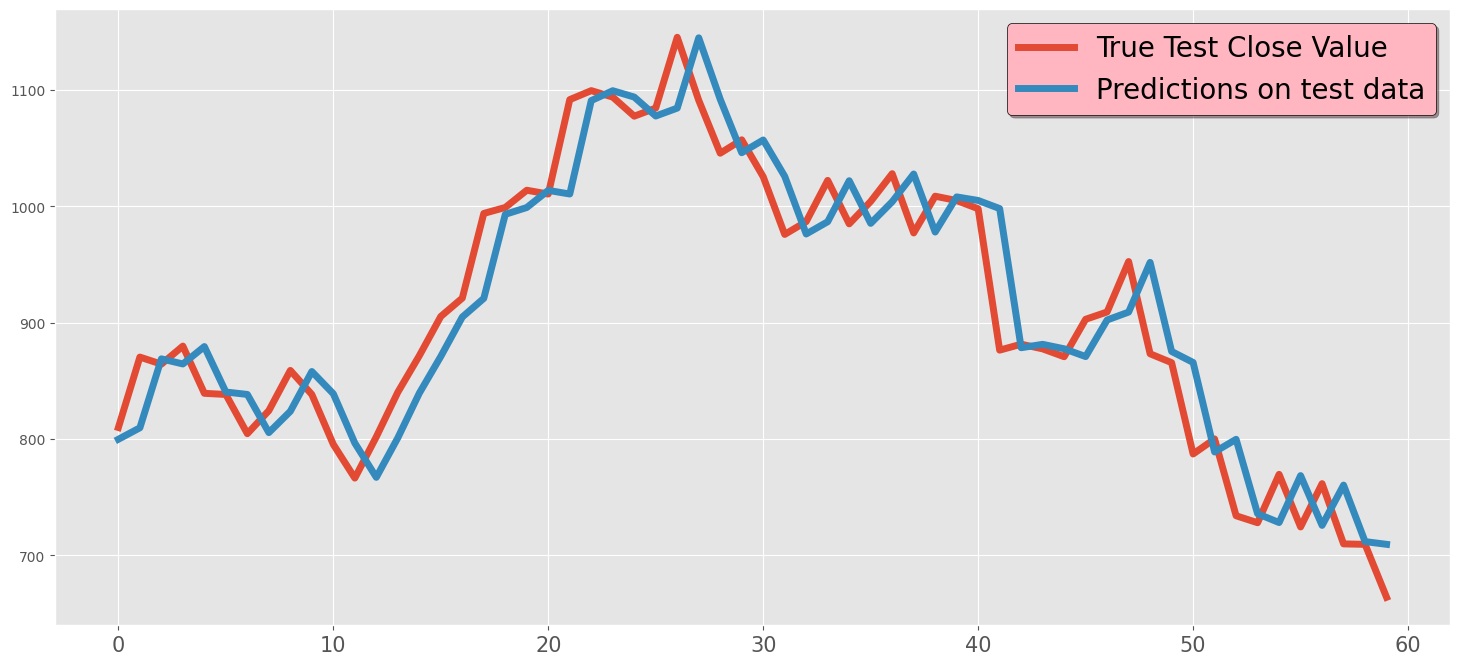

In [80]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [79]:
# sarimax model

import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error,r2_score

history = [x for x in train_data]
predictions = list()
conf_list = list()

for t in range(len(test_data)):
    model = SARIMAX(history, order=(1, 1, 0))
    model_fit = model.fit()

    # Forecast for one time step and get the confidence intervals
    forecast_result = model_fit.get_forecast(steps=1)
    forecast_mean = forecast_result.predicted_mean[0]
    forecast_stderr = forecast_result.se_mean[0]
    forecast_conf = forecast_result.conf_int(alpha=0.05)[0]

    predictions.append(forecast_mean)
    conf_list.append((forecast_conf[0], forecast_conf[1]))

    history.append(test_data[t])

print("RMSE of Sarimax Model:", np.sqrt(mean_squared_error(test_data, predictions)))
print("Accuracy of Sarimax Model:", r2_score(test_data, predictions))


RMSE of Sarimax Model: 39.475298262281285
Accuracy of Sarimax Model: 0.8890117457764755


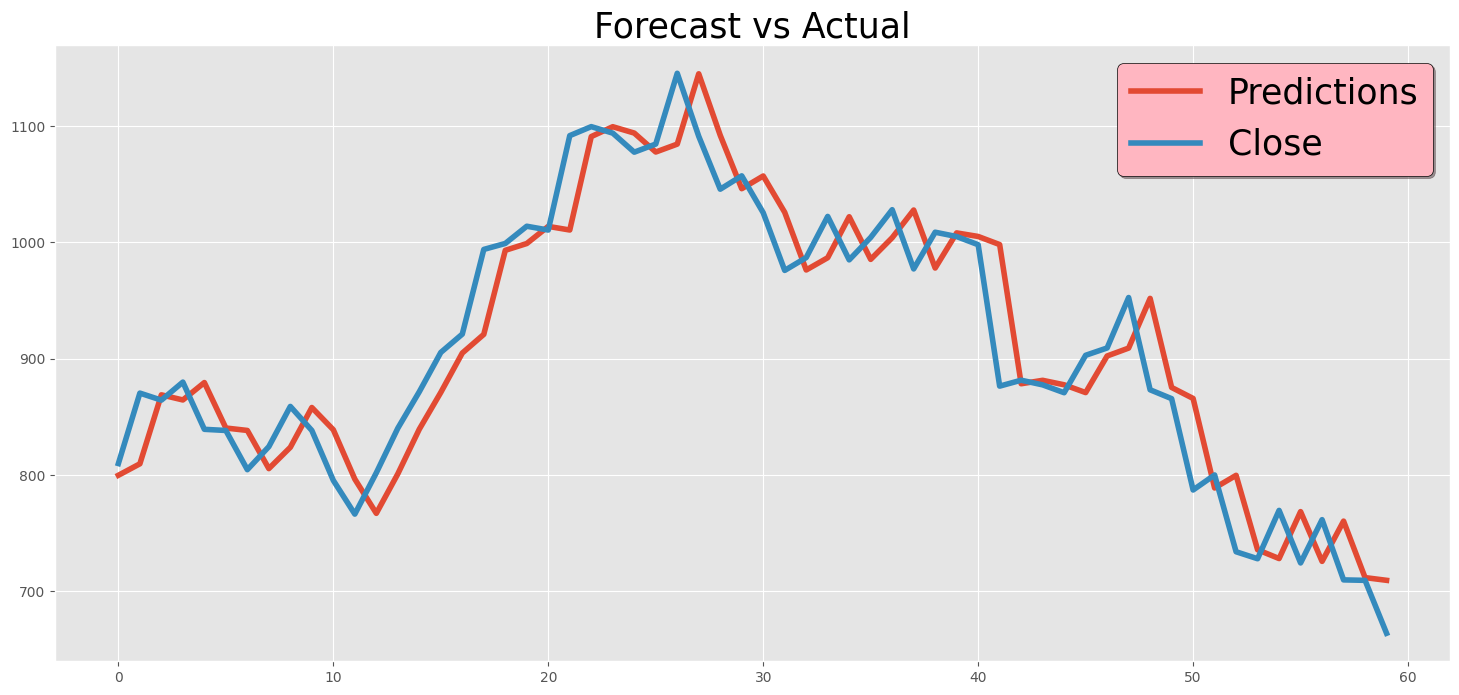

In [81]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [ ]:
df_close

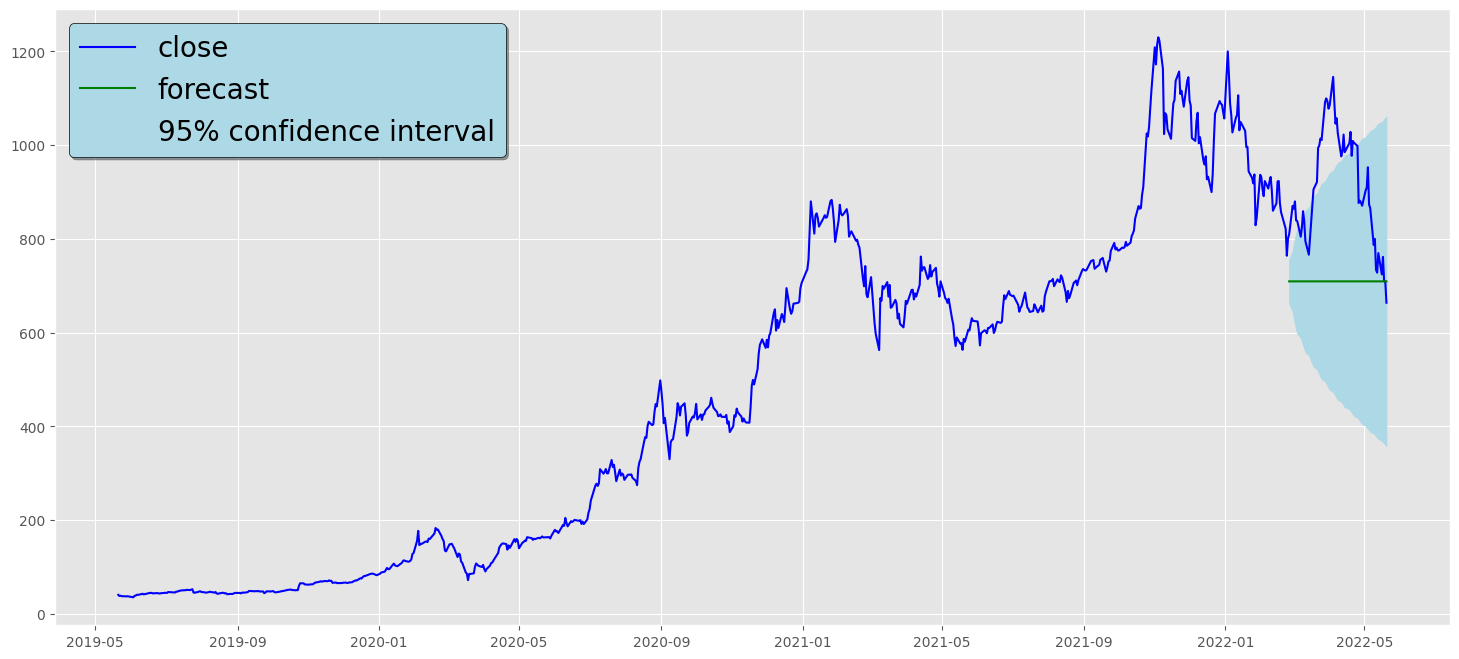

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the train_data and test_data defined
# and model_fit is the fitted SARIMAX model

# Get forecasted values, standard errors, and confidence intervals
forecast_result = model_fit.get_forecast(steps=len(test_data))
forecast_mean = forecast_result.predicted_mean
forecast_stderr = forecast_result.se_mean
forecast_conf = forecast_result.conf_int()

# Plot the forecast and the confidence interval
fig = plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(111)

# Assuming df_close is the DataFrame containing historical data
ax1.plot(df_close.index, df_close, label="close", color="blue")
ax1.plot(test_data.index, forecast_mean, label="forecast", color="green")
ax1.fill_between(test_data.index, forecast_conf[:, 0], forecast_conf[:, 1], color="lightblue")

plt.grid("both")
plt.legend(["close", "forecast", "95% confidence interval"], fontsize=20, shadow=True, facecolor="lightblue", edgecolor="k")
plt.show()
